In [1]:
import polars as pl

# 读取数据
data = pl.read_parquet("daily_data.pa")

# 排序数据
df = data.sort('open_time').sort("symbol")

# 计算每个时刻的价格变动
df = df.with_columns([
    (pl.col("close") - pl.col("open")).alias("price_change"),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

# 计算成交量加权的价格变动
df = df.with_columns([
    (pl.col("price_change") * pl.col("volume")).alias("volume_weighted_price_change")
])

print(df)

shape: (191_828, 15)
┌────────────┬──────────┬──────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ open_time  ┆ open     ┆ high     ┆ low      ┆ … ┆ symbol     ┆ price_cha ┆ return    ┆ volume_we │
│ ---        ┆ ---      ┆ ---      ┆ ---      ┆   ┆ ---        ┆ nge       ┆ ---       ┆ ighted_pr │
│ datetime[μ ┆ f64      ┆ f64      ┆ f64      ┆   ┆ str        ┆ ---       ┆ f64       ┆ ice_chang │
│ s]         ┆          ┆          ┆          ┆   ┆            ┆ f64       ┆           ┆ e         │
│            ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ ---       │
│            ┆          ┆          ┆          ┆   ┆            ┆           ┆           ┆ f64       │
╞════════════╪══════════╪══════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ 2023-11-22 ┆ 0.00478  ┆ 0.004825 ┆ 0.004076 ┆ … ┆ 1000BONKUS ┆ -0.000249 ┆ null      ┆ -3.1625e6 │
│ 00:00:00   ┆          ┆          ┆          ┆   ┆ DT         ┆      

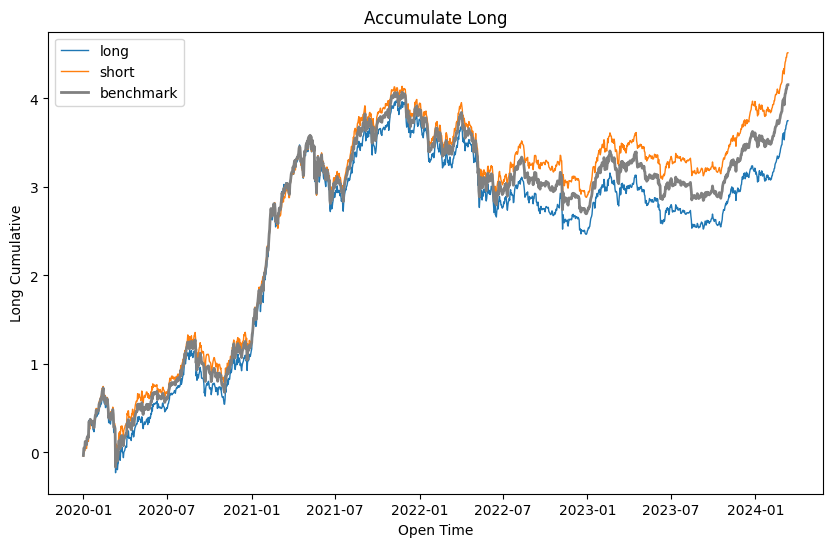

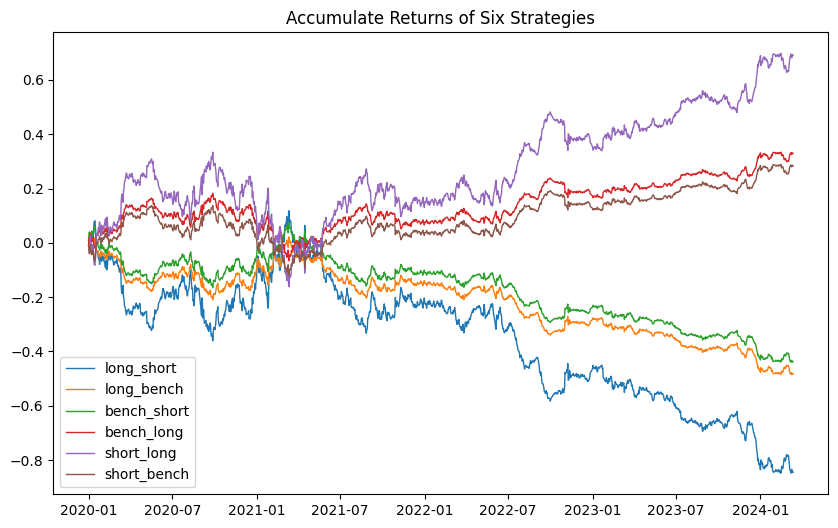

long: 
ann_return = 21.422  sharpe = 4.6954  maxdd = 0.5429  calmar_ratio = 39.4553  

short: 
ann_return = 25.8082  sharpe = 5.5616  maxdd = 0.5019  calmar_ratio = 51.4193  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -4.8242  sharpe = -3.7608  maxdd = 0.8645  calmar_ratio = -5.5802  

long_bench: 
ann_return = -2.7608  sharpe = -4.2843  maxdd = 0.4958  calmar_ratio = -5.5685  

bench_long: 
ann_return = 1.8848  sharpe = 2.9249  maxdd = 0.2097  calmar_ratio = 8.987  

short_long: 
ann_return = 3.9482  sharpe = 3.0779  maxdd = 0.3716  calmar_ratio = 10.626  

short_bench: 
ann_return = 1.6254  sharpe = 2.511  maxdd = 0.2249  calmar_ratio = 7.2275  

bench_short: 
ann_return = -2.5014  sharpe = -3.8643  maxdd = 0.4782  calmar_ratio = -5.2307  



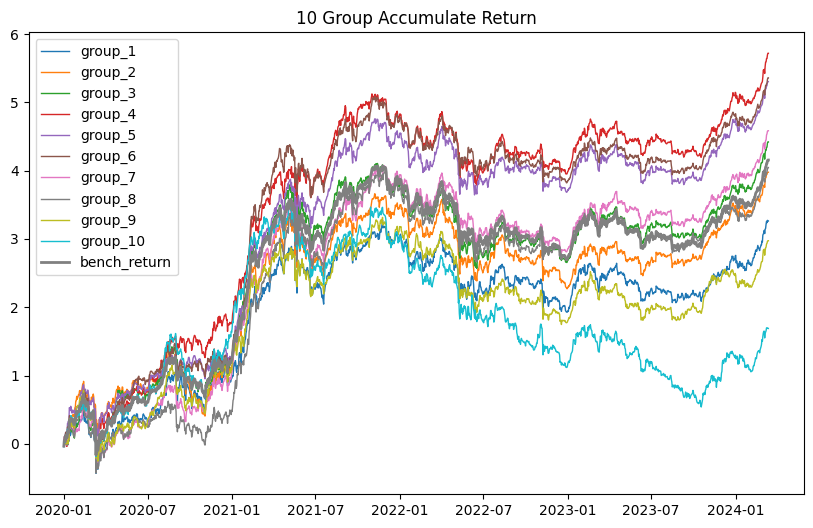

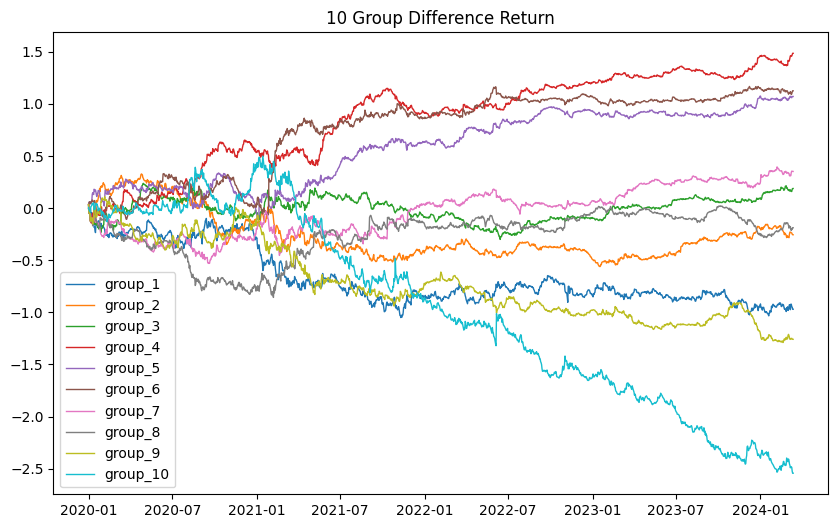

group_1: 
ann_return = 18.6372  sharpe = 3.7549  maxdd = 0.6158  calmar_ratio = 30.267  

group_2: 
ann_return = 22.7237  sharpe = 4.6963  maxdd = 0.4133  calmar_ratio = 54.9859  

group_3: 
ann_return = 25.261  sharpe = 5.2973  maxdd = 0.5701  calmar_ratio = 44.3069  

group_4: 
ann_return = 32.6746  sharpe = 6.8109  maxdd = 0.5444  calmar_ratio = 60.0139  

group_5: 
ann_return = 30.3056  sharpe = 6.3733  maxdd = 0.4159  calmar_ratio = 72.8649  

group_6: 
ann_return = 30.6188  sharpe = 6.2277  maxdd = 0.5135  calmar_ratio = 59.6247  

group_7: 
ann_return = 26.1946  sharpe = 5.531  maxdd = 0.5682  calmar_ratio = 46.1029  

group_8: 
ann_return = 23.1132  sharpe = 4.7249  maxdd = 0.6431  calmar_ratio = 35.9422  

group_9: 
ann_return = 16.9918  sharpe = 3.5499  maxdd = 0.582  calmar_ratio = 29.1935  

group_10: 
ann_return = 9.6472  sharpe = 1.9657  maxdd = 0.6592  calmar_ratio = 14.6351  

-----------------------------------------
group_difference_1: 
ann_return = -5.5456  sharpe = 

In [2]:
factors = df.select(['open_time', 'symbol', 'volume_weighted_price_change'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()